https://www.blog.pythonlibrary.org/2010/02/03/another-step-by-step-sqlalchemy-tutorial-part-1-of-2/

View db with DB browser for SQLite http://sqlitebrowser.org/

Cheat sheet https://www.pythonsheets.com/notes/python-sqlalchemy.html

In [1]:
import sqlalchemy
print(sqlalchemy.__version__)

1.2.7


In [2]:
from sqlalchemy import create_engine
from sqlalchemy import MetaData, Column, Table, ForeignKey
from sqlalchemy import Integer, String
from sqlalchemy import inspect
from sqlalchemy.sql import select
from sqlalchemy.sql import and_
import pandas as pd

Using a postgres server

In [3]:
from sqlalchemy import create_engine
engine = create_engine('postgresql://localhost/robincole', echo=True)

/Users/robincole/anaconda3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [11]:
# Alternatively using sqlite
# engine = create_engine('sqlite:///tutorial.db', echo=True)

Next step creates the .db file

In [12]:
metadata = MetaData(bind=engine)
 
users_table = Table('users', metadata,
                    Column('id', Integer, primary_key=True),
                    Column('name', String(40)),
                    Column('age', Integer),
                    Column('password', String),
                    )
 
addresses_table = Table('addresses', metadata,
                        Column('id', Integer, primary_key=True),
                        Column('user_id', None, ForeignKey('users.id')),
                        Column('email_address', String, nullable=False)                            
                        )
 
# create tables in database
metadata.create_all()

2018-09-02 08:11:39,962 INFO sqlalchemy.engine.base.Engine select version()
2018-09-02 08:11:39,963 INFO sqlalchemy.engine.base.Engine {}
2018-09-02 08:11:39,965 INFO sqlalchemy.engine.base.Engine select current_schema()
2018-09-02 08:11:39,966 INFO sqlalchemy.engine.base.Engine {}
2018-09-02 08:11:39,967 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2018-09-02 08:11:39,968 INFO sqlalchemy.engine.base.Engine {}
2018-09-02 08:11:39,970 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2018-09-02 08:11:39,970 INFO sqlalchemy.engine.base.Engine {}
2018-09-02 08:11:39,972 INFO sqlalchemy.engine.base.Engine show standard_conforming_strings
2018-09-02 08:11:39,972 INFO sqlalchemy.engine.base.Engine {}
2018-09-02 08:11:39,976 INFO sqlalchemy.engine.base.Engine select relname from pg_class c join pg_namespace n on n.oid=c.relnamespace where pg_catalog.pg_table_is_visible(c.oid) and relname=%(name)s
20

In [4]:
inspector = inspect(engine)

# Get table information
print(inspector.get_table_names())

2018-10-18 13:54:06,488 INFO sqlalchemy.engine.base.Engine select version()
2018-10-18 13:54:06,489 INFO sqlalchemy.engine.base.Engine {}
2018-10-18 13:54:06,499 INFO sqlalchemy.engine.base.Engine select current_schema()
2018-10-18 13:54:06,500 INFO sqlalchemy.engine.base.Engine {}
2018-10-18 13:54:06,509 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2018-10-18 13:54:06,511 INFO sqlalchemy.engine.base.Engine {}
2018-10-18 13:54:06,516 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2018-10-18 13:54:06,517 INFO sqlalchemy.engine.base.Engine {}
2018-10-18 13:54:06,524 INFO sqlalchemy.engine.base.Engine show standard_conforming_strings
2018-10-18 13:54:06,526 INFO sqlalchemy.engine.base.Engine {}
2018-10-18 13:54:06,538 INFO sqlalchemy.engine.base.Engine SELECT c.relname FROM pg_class c JOIN pg_namespace n ON n.oid = c.relnamespace WHERE n.nspname = %(schema)s AND c.relkind = 'r'
2018-10-18 13:

In [14]:
# Get column information
print(inspector.get_columns('users'))

2018-09-02 08:11:47,424 INFO sqlalchemy.engine.base.Engine 
            SELECT c.oid
            FROM pg_catalog.pg_class c
            LEFT JOIN pg_catalog.pg_namespace n ON n.oid = c.relnamespace
            WHERE (pg_catalog.pg_table_is_visible(c.oid))
            AND c.relname = %(table_name)s AND c.relkind in ('r', 'v', 'm', 'f')
        
2018-09-02 08:11:47,425 INFO sqlalchemy.engine.base.Engine {'table_name': 'users'}
2018-09-02 08:11:47,430 INFO sqlalchemy.engine.base.Engine 
            SELECT a.attname,
              pg_catalog.format_type(a.atttypid, a.atttypmod),
              (SELECT pg_catalog.pg_get_expr(d.adbin, d.adrelid)
                FROM pg_catalog.pg_attrdef d
               WHERE d.adrelid = a.attrelid AND d.adnum = a.attnum
               AND a.atthasdef)
              AS DEFAULT,
              a.attnotnull, a.attnum, a.attrelid as table_oid,
              pgd.description as comment
            FROM pg_catalog.pg_attribute a
            LEFT JOIN pg_catalog.pg_

### Insert some data

In [15]:
# create an Insert object
ins = users_table.insert()
# add values to the Insert object
new_user = ins.values(name="Joe", age=20, password="pass")
 
# create a database connection
conn = engine.connect()
# add user to database by executing SQL
conn.execute(new_user)

2018-09-02 08:11:50,602 INFO sqlalchemy.engine.base.Engine INSERT INTO users (name, age, password) VALUES (%(name)s, %(age)s, %(password)s) RETURNING users.id
2018-09-02 08:11:50,603 INFO sqlalchemy.engine.base.Engine {'name': 'Joe', 'age': 20, 'password': 'pass'}
2018-09-02 08:11:50,606 INFO sqlalchemy.engine.base.Engine COMMIT


In [16]:
# a connectionless way to Insert a user
ins = users_table.insert()
result = engine.execute(ins, name="Shinji", age=15, password="nihongo")
 
# another connectionless Insert
result = users_table.insert().execute(name="Martha", age=45, password="dingbat")

2018-09-02 08:11:52,196 INFO sqlalchemy.engine.base.Engine INSERT INTO users (name, age, password) VALUES (%(name)s, %(age)s, %(password)s) RETURNING users.id
2018-09-02 08:11:52,197 INFO sqlalchemy.engine.base.Engine {'name': 'Shinji', 'age': 15, 'password': 'nihongo'}
2018-09-02 08:11:52,201 INFO sqlalchemy.engine.base.Engine COMMIT
2018-09-02 08:11:52,203 INFO sqlalchemy.engine.base.Engine INSERT INTO users (name, age, password) VALUES (%(name)s, %(age)s, %(password)s) RETURNING users.id
2018-09-02 08:11:52,204 INFO sqlalchemy.engine.base.Engine {'name': 'Martha', 'age': 45, 'password': 'dingbat'}
2018-09-02 08:11:52,205 INFO sqlalchemy.engine.base.Engine COMMIT


Insert multiple rows

In [17]:
conn.execute(users_table.insert(), [
    {"name": "Ted", "age":10, "password":"dink"},
    {"name": "Asahina", "age":25, "password":"nippon"},
    {"name": "Evan", "age":40, "password":"macaca"}
])

2018-09-02 08:11:53,434 INFO sqlalchemy.engine.base.Engine INSERT INTO users (name, age, password) VALUES (%(name)s, %(age)s, %(password)s)
2018-09-02 08:11:53,436 INFO sqlalchemy.engine.base.Engine ({'name': 'Ted', 'age': 10, 'password': 'dink'}, {'name': 'Asahina', 'age': 25, 'password': 'nippon'}, {'name': 'Evan', 'age': 40, 'password': 'macaca'})
2018-09-02 08:11:53,440 INFO sqlalchemy.engine.base.Engine COMMIT


In [18]:
### Selecting
 
s = select([users_table])
result = s.execute()
 
for row in result:
    print(row)

2018-09-02 08:11:55,055 INFO sqlalchemy.engine.base.Engine SELECT users.id, users.name, users.age, users.password 
FROM users
2018-09-02 08:11:55,056 INFO sqlalchemy.engine.base.Engine {}
(1, 'Joe', 20, 'pass')
(2, 'Joe', 20, 'pass')
(3, 'Shinji', 15, 'nihongo')
(4, 'Martha', 45, 'dingbat')
(5, 'Ted', 10, 'dink')
(6, 'Asahina', 25, 'nippon')
(7, 'Evan', 40, 'macaca')


Get all the results in a list of tuples

In [19]:
conn = engine.connect()
res = conn.execute(s)
rows = res.fetchall()

2018-09-02 08:11:57,175 INFO sqlalchemy.engine.base.Engine SELECT users.id, users.name, users.age, users.password 
FROM users
2018-09-02 08:11:57,177 INFO sqlalchemy.engine.base.Engine {}


In [20]:
rows

[(1, 'Joe', 20, 'pass'),
 (2, 'Joe', 20, 'pass'),
 (3, 'Shinji', 15, 'nihongo'),
 (4, 'Martha', 45, 'dingbat'),
 (5, 'Ted', 10, 'dink'),
 (6, 'Asahina', 25, 'nippon'),
 (7, 'Evan', 40, 'macaca')]

In [21]:
s = select([users_table.c.name, users_table.c.age])
result = conn.execute(s)
for row in result:
    print(row)

2018-09-02 08:11:58,262 INFO sqlalchemy.engine.base.Engine SELECT users.name, users.age 
FROM users
2018-09-02 08:11:58,263 INFO sqlalchemy.engine.base.Engine {}
('Joe', 20)
('Joe', 20)
('Shinji', 15)
('Martha', 45)
('Ted', 10)
('Asahina', 25)
('Evan', 40)


In [22]:
# The following is the equivalent to 
# SELECT * FROM users WHERE id > 3
s = select([users_table], users_table.c.id > 3)
result = conn.execute(s)
for row in result:
    print(row)

2018-09-02 08:11:58,807 INFO sqlalchemy.engine.base.Engine SELECT users.id, users.name, users.age, users.password 
FROM users 
WHERE users.id > %(id_1)s
2018-09-02 08:11:58,809 INFO sqlalchemy.engine.base.Engine {'id_1': 3}
(4, 'Martha', 45, 'dingbat')
(5, 'Ted', 10, 'dink')
(6, 'Asahina', 25, 'nippon')
(7, 'Evan', 40, 'macaca')


In [23]:
# You can use the "and_" module to AND multiple fields together

s = select([users_table]).where(and_(users_table.c.name == 'Martha',users_table.c.age < 25))

result = conn.execute(s)
for row in result:
    print(row)

2018-09-02 08:11:59,443 INFO sqlalchemy.engine.base.Engine SELECT users.id, users.name, users.age, users.password 
FROM users 
WHERE users.name = %(name_1)s AND users.age < %(age_1)s
2018-09-02 08:11:59,444 INFO sqlalchemy.engine.base.Engine {'name_1': 'Martha', 'age_1': 25}


## Pandas
Lets get the data as a dataframe

In [24]:
sql = "select * from users"
print('Performing query...')
df = pd.read_sql(sql, con=engine)

Performing query...
2018-09-02 08:12:02,850 INFO sqlalchemy.engine.base.Engine select relname from pg_class c join pg_namespace n on n.oid=c.relnamespace where pg_catalog.pg_table_is_visible(c.oid) and relname=%(name)s
2018-09-02 08:12:02,850 INFO sqlalchemy.engine.base.Engine {'name': 'select * from users'}
2018-09-02 08:12:02,855 INFO sqlalchemy.engine.base.Engine select * from users
2018-09-02 08:12:02,855 INFO sqlalchemy.engine.base.Engine {}


In [25]:
df

,id,name,age,password
0,1,Joe,20,pass
1,2,Joe,20,pass
2,3,Shinji,15,nihongo
3,4,Martha,45,dingbat
4,5,Ted,10,dink
5,6,Asahina,25,nippon
6,7,Evan,40,macaca


In [26]:
df_copy = df.copy()

In [27]:
df_copy

,id,name,age,password
0,1,Joe,20,pass
1,2,Joe,20,pass
2,3,Shinji,15,nihongo
3,4,Martha,45,dingbat
4,5,Ted,10,dink
5,6,Asahina,25,nippon
6,7,Evan,40,macaca


In [28]:
new_entry = {}
new_entry['id'] = 6
new_entry['name'] = 'Robin'
new_entry['age'] = 100
new_entry['password'] = 'foo'
new_entry

{'id': 6, 'name': 'Robin', 'age': 100, 'password': 'foo'}

In [29]:
new_entry_s = pd.Series(new_entry) # Create the series from a dic

In [30]:
new_entry_s

id              6
name        Robin
age           100
password      foo
dtype: object

In [31]:
df_copy = df_copy.append(new_entry_s, ignore_index=True)

In [32]:
df_copy

,id,name,age,password
0,1,Joe,20,pass
1,2,Joe,20,pass
2,3,Shinji,15,nihongo
3,4,Martha,45,dingbat
4,5,Ted,10,dink
5,6,Asahina,25,nippon
6,7,Evan,40,macaca
7,6,Robin,100,foo


In [ ]:
df_copy.to_sql(name='users', con=engine, if_exists='replace', index=False)

2018-09-02 08:12:10,054 INFO sqlalchemy.engine.base.Engine select relname from pg_class c join pg_namespace n on n.oid=c.relnamespace where pg_catalog.pg_table_is_visible(c.oid) and relname=%(name)s
2018-09-02 08:12:10,055 INFO sqlalchemy.engine.base.Engine {'name': 'users'}
2018-09-02 08:12:10,060 INFO sqlalchemy.engine.base.Engine select relname from pg_class c join pg_namespace n on n.oid=c.relnamespace where pg_catalog.pg_table_is_visible(c.oid) and relname=%(name)s
2018-09-02 08:12:10,061 INFO sqlalchemy.engine.base.Engine {'name': 'users'}
2018-09-02 08:12:10,063 INFO sqlalchemy.engine.base.Engine SELECT c.relname FROM pg_class c JOIN pg_namespace n ON n.oid = c.relnamespace WHERE n.nspname = %(schema)s AND c.relkind = 'r'
2018-09-02 08:12:10,064 INFO sqlalchemy.engine.base.Engine {'schema': 'public'}
2018-09-02 08:12:10,067 INFO sqlalchemy.engine.base.Engine 
            SELECT c.oid
            FROM pg_catalog.pg_class c
            LEFT JOIN pg_catalog.pg_namespace n ON n.oid 

In [ ]:
pd.read_sql_query("select * from users;", conn)

Can also use pgadmin to view data

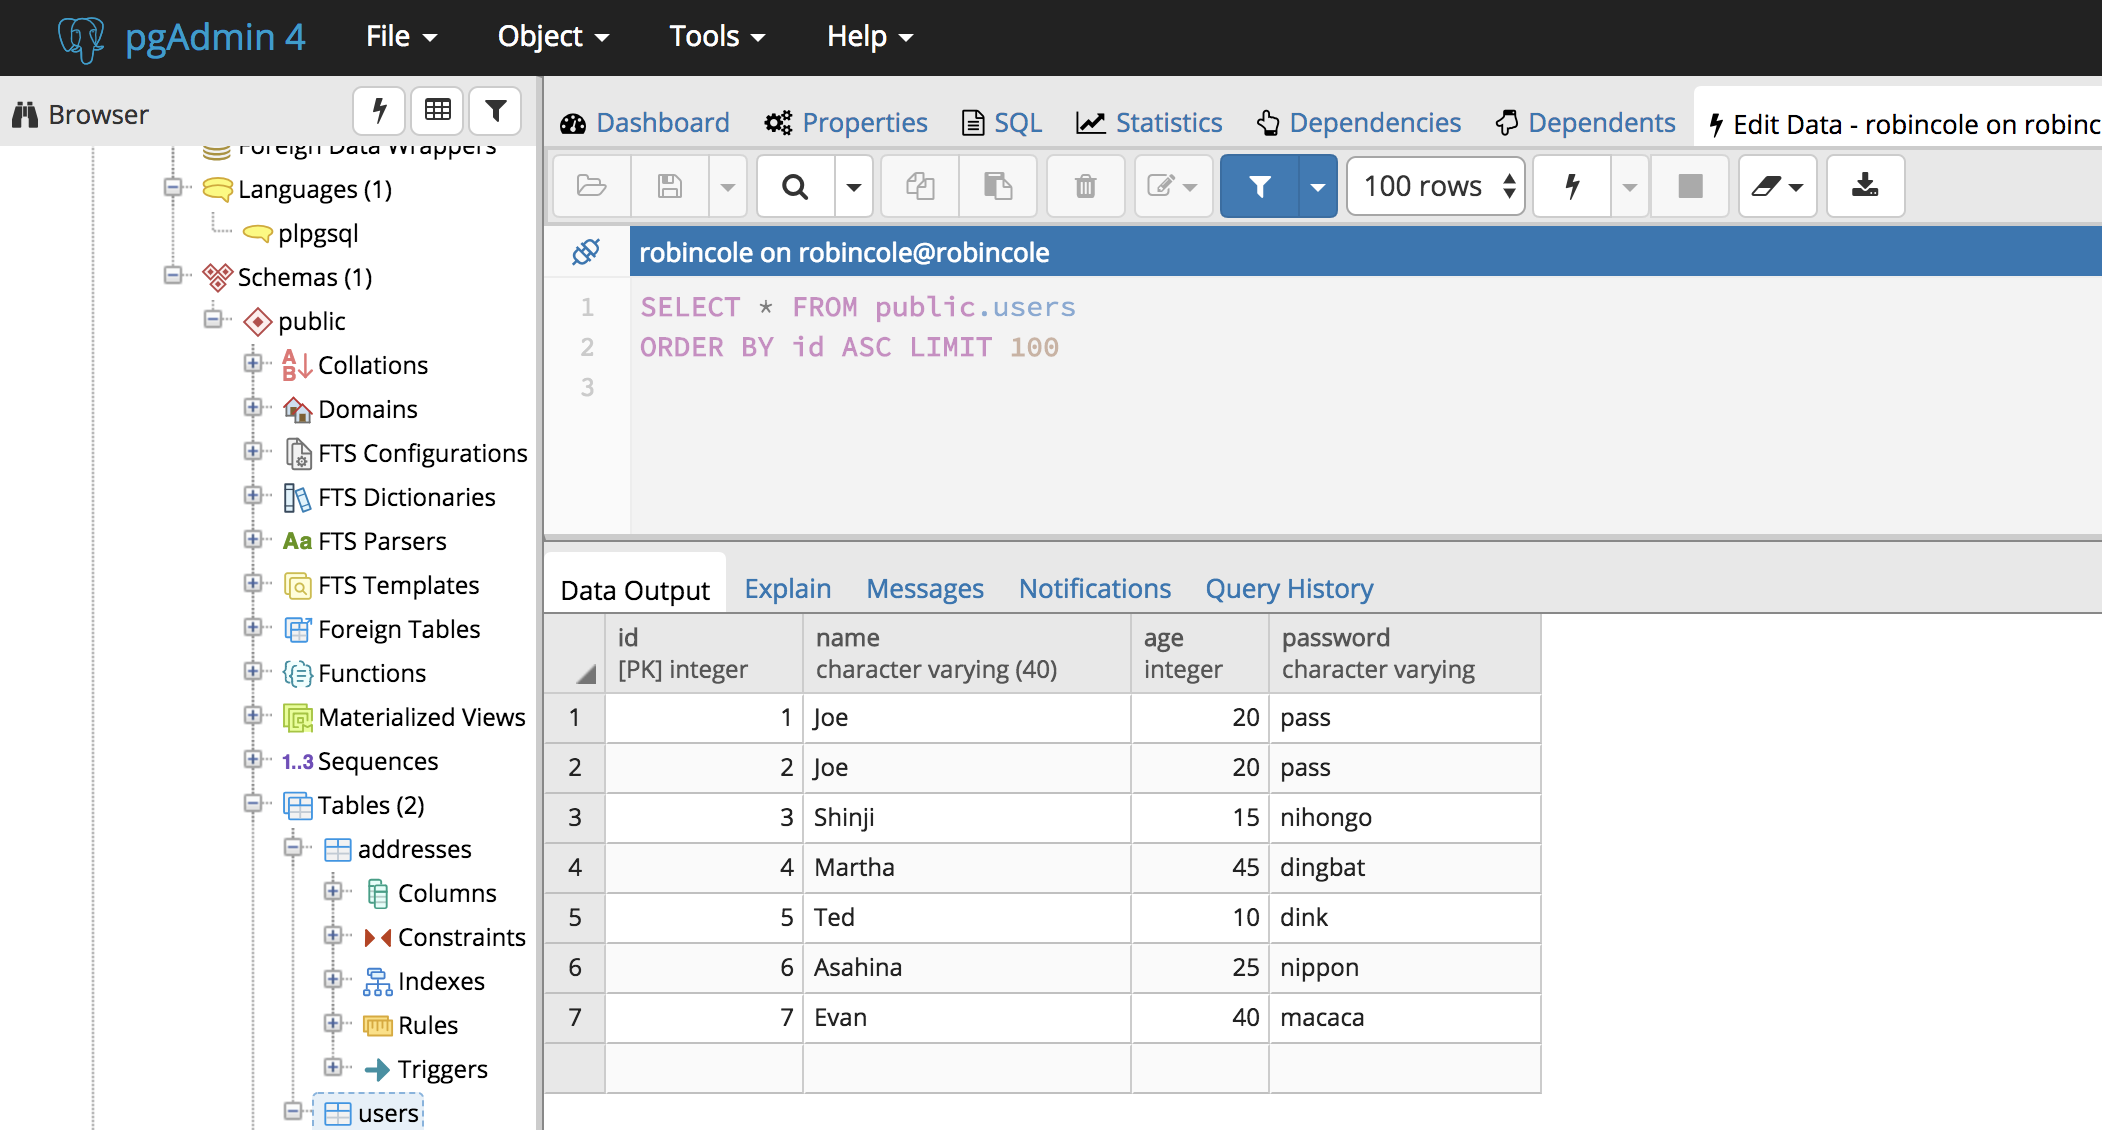

In [7]:
from IPython.display import Image
Image("pgadmin.png")